# PERCEPTRON
Modèle du perceptron "historique" : ajout des composantes du vecteur de données "X" pondérées par le vecteur des poids "W"  auquelles on soustrait le biais "b". On applique enfin une fonction échelon (tout ou rien) au vecteur résultat s'il est positif.
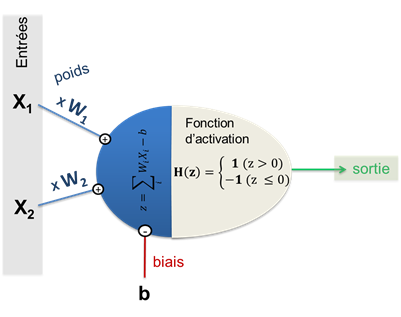

## Données concernant la morphologie des chiens et des chats adultes
Les données sont regroupées dans un fichier "Data_dogs&cats.txt. La première valeur du tableau (première colonne) est le rapport Longueur / Hauteur (du corps) la seconde le rapport Longueur / largeur (du corps), la troisième est le rapport longueur de la tête / hauteur de celle-ci enfin la dernière vaut "1" pour un chien et "0" pour un chat.
Le tableau numpy "Data_X" contient les données et le vecteur "Data_Etiquette" s'il s'agit d'un chien (1) ou d'un chat (0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

with open("Data_dogs&cats.txt","r",encoding="utf8") as FichierDonnees:
    liste_a = list()
    liste_b = list()
    liste_c = list()
    liste_d = list()
    
    liste_chien_a = list()
    liste_chien_b = list()
    liste_chien_c = list()
    
    liste_chat_a = list()
    liste_chat_b = list()
    liste_chat_c = list()
    
    
    for line in FichierDonnees:
        if "#" in line :
        # on saute la ligne
            continue
        donnees = line.split()
        liste_a.append(float(donnees[0]))
        liste_b.append(float(donnees[1]))
        liste_c.append(float(donnees[2]))
        liste_d.append(int(donnees[3]))
        
        if (donnees[3]=="1"):
            liste_chien_a.append(float(donnees[0]))
            liste_chien_b.append(float(donnees[1]))
            liste_chien_c.append(float(donnees[2]))
        else:
            liste_chat_a.append(float(donnees[0]))
            liste_chat_b.append(float(donnees[1]))
            liste_chat_c.append(float(donnees[2]))
          
Data_X = np.zeros((3,len(liste_a)), dtype=float)
Data_chien = np.zeros((3,len(liste_chien_a)), dtype=float)
Data_chat = np.zeros((3,len(liste_chat_a)), dtype=float)


Data_X[0]=liste_a
Data_X[1]=liste_b
Data_X[2]=liste_c

Data_chien[0]=liste_chien_a
Data_chien[1]=liste_chien_b
Data_chien[2]=liste_chien_c

Data_chat[0]=liste_chat_a
Data_chat[1]=liste_chat_b
Data_chat[2]=liste_chat_c

Data_X = Data_X.transpose()
Data_chien = Data_chien.transpose()
Data_chat = Data_chat.transpose()

Data_Etiquette = np.array(liste_d)
Data_Etiquette = np.where(Data_Etiquette==0, -1 ,Data_Etiquette) # remplacement des 0 par des -1 pour les chats...

test = Data_X[0:50,0:2]
test2 = Data_Etiquette[0:50]

plt.rcParams['figure.figsize'] = [6, 6]

plt.scatter(Data_chien[:,0], Data_chien[:,1], c='b')
plt.scatter(Data_chat[:,0], Data_chat[:,1], c='r')


#plt.title('Données morphologiques sur des chiens et des chats', fontsize=12)
plt.xlabel("Rapport longueur du corps / hauteur au garrot", fontsize=12)
plt.ylabel('Rapport longueur / largeur du corps', fontsize=12)


: 

## Perceptron à 2 paramètres

In [ ]:
   
def perceptron(X, W, b):
    Z = X.dot(W) - b
    return np.where(Z<0,-1,+1)

W = np.array([-0.5,0.5])   # initialisation des paramètres du perceptron
b = 0.5

max_iter = 10
vites_ap = 0.1

for pass_apprentissage in range(1):
    for iteration in range(max_iter):
        test = Data_X[:,0:2]
        etiq_test = Data_Etiquette[:]
        X = np.arange(-20.0 , 20. , 0.01) # inutile ?
        Y = Droite_decision(X, W, b) #
          
        for data, etiq in zip(test, Data_Etiquette):
            activation = data.dot(W) - b
            if (etiq*activation<=0):
                W = W + vites_ap*data*etiq
                b -= vites_ap*etiq

def convertion(W1,W2,bias):
    Ra = 10**3
    Rd1 = 10**3
    V = 15
    return Ra/W1 , Ra/W2, Rd1/(V/bias - 1)

W_fin = W
b_fin = b
print("W1=",W[0],", W2=",W[1],", biais=",b)
print(convertion(W[0],W[1],b))

W1= -1.0107686897000001 , W2= -0.12242352009999968 , biais= -1.5000000000000002


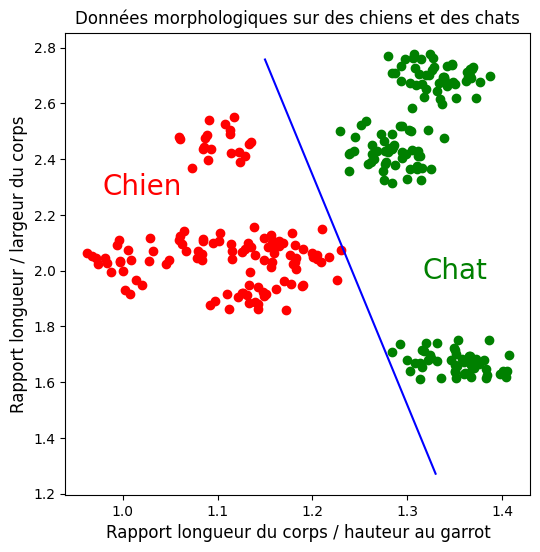

In [12]:
def Droite_decision(x, W_fin, b_fin):
    return -(W_fin[0]/W_fin[1])*x + b_fin/W_fin[1]
X = np.arange(1.15 , 1.33 , 0.01)
Y = Droite_decision(X, W_fin, b_fin)

plt.rcParams['figure.figsize'] = [6, 6]

plt.plot(X,Y,'b')

plt.scatter(Data_chien[:,0], Data_chien[:,1], c='r')
plt.scatter(Data_chat[:,0], Data_chat[:,1], c='g')
plt.text(1.02, 2.3, 'Chien', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20, color = 'r')
plt.text(1.35, 2, 'Chat', horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20, color = 'g')

plt.title('Données morphologiques sur des chiens et des chats', fontsize=12)
plt.xlabel("Rapport longueur du corps / hauteur au garrot", fontsize=12)
plt.ylabel('Rapport longueur / largeur du corps', fontsize=12)

plt.show()

## Perceptron à 3 paramètres

In [13]:
# Initialisation à 0 des paramètres du perceptron à 3 paramètres

W = np.array([0.1,0.1,0.1])
b = 0
max_iter = 100
vites_ap = 0.2

for pass_apprentissage in range(10):
    
    for iteration in range(max_iter):
        test = Data_X[:,:]
        etiq_test = Data_Etiquette[:]
        for data, etiq in zip(test, Data_Etiquette):
            activation = data.dot(W) - b
            if (etiq*activation<=0):
                W=W + vites_ap*data*etiq
                b-=vites_ap*etiq

W_fin , b_fin = W , b
    
def perceptron(X, W, b):
    Z = X.dot(W) - b
    return np.where(Z<0,-1,+1)

print(W_fin, b_fin)

[-1.08334835 -1.56486979  3.15733887] -1.0


In [139]:
print(perceptron(np.array([1.31,2.63]), W_fin, b_fin)) # un chat siamois

-1


In [140]:
print(perceptron(np.array([1.11,2.46]), W_fin, b_fin)) # un dalmatien

1


In [2]:
conv = 255/5.0
1.35*conv , 2.6*conv

(68.85000000000001, 132.6)